# Read data from file via prompt 

##### Initialisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

Prompt for the data-file to be read. (for this example to work, type in ''CPtestData.csv''. The file contains two columns of data that are separated with a comma. 

In [2]:
datafile=input("What is the name of the data file: ")
f=np.loadtxt(datafile,float,delimiter=',')

What is the name of the data file: CPtestData.csv


Getting the data from the file and give some feedback on the data read. 

In [9]:
print("The data read is: \n",f)
idvar=int(input("What is the column number for the independent data (x)? "))
dvar=int(input("What is the column number for the dependent data (y)? "))
xd=f[:,(idvar-1)]
yd=f[:,(dvar-1)]
print("The x-data read is: \n",xd)
print("The y-data read is: \n",yd)
x_min=np.min(xd)-1.
x_max=np.max(xd)+1.

The data read is: 
 [[ 1.   1.1]
 [ 2.   3.9]
 [ 3.   9.3]
 [ 4.  16.5]]
What is the column number for the independent data (x)? 1
What is the column number for the dependent data (y)? 2
The x-data read is: 
 [1. 2. 3. 4.]
The y-data read is: 
 [ 1.1  3.9  9.3 16.5]


#### Define the functions for the model to fit on:

We need to define two functions, the first one is the function to calculate the function values. The second one is the function to be used by the fitting function.

In [10]:
def fun(x, A, itau):
    return A * np.exp(-itau * x)
def fitfun(coef,x,y):
    return coef[0] * np.exp(-coef[1] * x) -y

set some seed values for the fitting function and start the fit. Use the results to make a table of fitted function values for plotting. 

In [18]:
coef0 = np.ones(2)
res_lsq = least_squares(fitfun, coef0, args=(xd, yd))
x_test = np.linspace(x_min, x_max, 300)
y_fit = fun(x_test, *res_lsq.x)

print(f"Fitting coefficients are: \nA = {res_lsq.x[0]:5.2f} and itau = {res_lsq.x[1]:5.2f}")

Fitting coefficients are: 
A =  1.02 and itau = -0.70


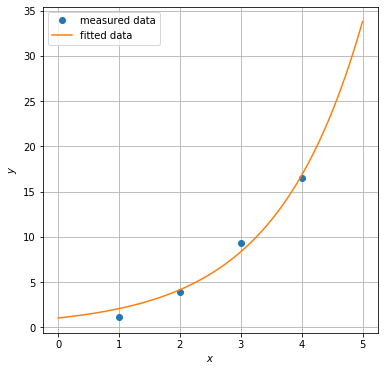

In [19]:
plt.figure(figsize=(6,6))
plt.plot(xd, yd, 'o', label='measured data')
plt.plot(x_test, y_fit, label='fitted data')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.legend()
plt.show()